In [ ]:
# Purpose: Import required libraries for text data preprocessing
# This cell imports all necessary libraries for downloading, cleaning, tokenizing,
# removing stop words, stemming, and analyzing text data

import requests
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

print("All required libraries imported successfully!")

[nltk_data] Downloading package punkt to /Users/ujjwal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ujjwal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ujjwal/nltk_data...


All required libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Purpose: Load text data from the provided URL
# This cell downloads the text file from the given URL and displays basic information about the raw text

# URL of the text file
url = "https://raw.githubusercontent.com/dscape/spell/master/test/resources/big.txt"

try:
    # Download the text file
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    # Get the text content
    raw_text = response.text

    print("Text file downloaded successfully!")
    print(f"Total characters in raw text: {len(raw_text)}")
    print(f"Total lines in raw text: {len(raw_text.splitlines())}")
    print("\nFirst 500 characters of the raw text:")
    print(raw_text[:500])

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Text file downloaded successfully!
Total characters in raw text: 6488666
Total lines in raw text: 128457

First 500 characters of the raw text:
The Project Gutenberg EBook of The Adventures of Sherlock Holmes
by Sir Arthur Conan Doyle
(#15 in our series by Sir Arthur Conan Doyle)

Copyright laws are changing all over the world. Be sure to check the
copyright laws for your country before downloading or redistributing
this or any other Project Gutenberg eBook.

This header should be the first thing seen when viewing this Project
Gutenberg file.  Please do not remove it.  Do not change or edit the
header without written permission.

Please


In [ ]:
# Purpose: Clean the raw text by removing unwanted characters
# This cell removes special symbols, digits, extra spaces, and converts text to lowercase

def clean_text(text):
    """
    Clean the input text by removing unwanted characters and normalizing
    """
    # Convert to lowercase
    text = text.lower()

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespaces and newlines
    text = re.sub(r'\s+', ' ', text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text

# Clean the raw text
cleaned_text = clean_text(raw_text)

print("Text cleaning completed!")
print(f"Characters before cleaning: {len(raw_text)}")
print(f"Characters after cleaning: {len(cleaned_text)}")
print(f"Reduction: {len(raw_text) - len(cleaned_text)} characters")
print("\nFirst 500 characters of cleaned text:")
print(cleaned_text[:500])


Text cleaning completed!
Characters before cleaning: 6488666
Characters after cleaning: 6166261
Reduction: 322405 characters

First 500 characters of cleaned text:
the project gutenberg ebook of the adventures of sherlock holmes by sir arthur conan doyle in our series by sir arthur conan doyle copyright laws are changing all over the world be sure to check the copyright laws for your country before downloading or redistributing this or any other project gutenberg ebook this header should be the first thing seen when viewing this project gutenberg file please do not remove it do not change or edit the header without written permission please read the legal 


In [ ]:
# Purpose: Tokenize the cleaned text into individual words
# This cell splits the cleaned text into tokens (individual words) using NLTK's word tokenizer

# Tokenize the cleaned text
tokens = word_tokenize(cleaned_text)

print("Tokenization completed!")
print(f"Total number of tokens: {len(tokens)}")
print(f"Unique tokens: {len(set(tokens))}")
print("\nFirst 50 tokens:")
print(tokens[:50])

# Display some statistics about token lengths
token_lengths = [len(token) for token in tokens]
print(f"\nToken length statistics:")
print(f"Average token length: {sum(token_lengths)/len(token_lengths):.2f}")
print(f"Shortest token length: {min(token_lengths)}")
print(f"Longest token length: {max(token_lengths)}")



Tokenization completed!
Total number of tokens: 1087140
Unique tokens: 35536

First 50 tokens:
['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'sir', 'arthur', 'conan', 'doyle', 'in', 'our', 'series', 'by', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', 'be', 'sure', 'to', 'check', 'the', 'copyright', 'laws', 'for', 'your', 'country', 'before', 'downloading', 'or', 'redistributing', 'this', 'or', 'any', 'other', 'project']

Token length statistics:
Average token length: 4.67
Shortest token length: 1
Longest token length: 45


In [ ]:
# Purpose: Remove stop words from the tokenized text
# This cell removes commonly used words (stop words) that don't carry significant meaning

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

print(f"Total stop words in English: {len(stop_words)}")
print("Examples of stop words:", list(stop_words)[:20])

# Filter out stop words from tokens
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

print(f"\nStop word removal completed!")
print(f"Tokens before removing stop words: {len(tokens)}")
print(f"Tokens after removing stop words: {len(filtered_tokens)}")
print(f"Stop words removed: {len(tokens) - len(filtered_tokens)}")

print(f"\nFirst 50 tokens after stop word removal:")
print(filtered_tokens[:50])


Total stop words in English: 198
Examples of stop words: ['own', "it'll", 'himself', 'whom', 'too', 'does', 'all', "i'd", 'off', 'or', 'we', 'for', "isn't", 'during', 'couldn', 're', 'their', "hasn't", 'then', "we've"]

Stop word removal completed!
Tokens before removing stop words: 1087140
Tokens after removing stop words: 552667
Stop words removed: 534473

First 50 tokens after stop word removal:
['project', 'gutenberg', 'ebook', 'adventures', 'sherlock', 'holmes', 'sir', 'arthur', 'conan', 'doyle', 'series', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'changing', 'world', 'sure', 'check', 'copyright', 'laws', 'country', 'downloading', 'redistributing', 'project', 'gutenberg', 'ebook', 'header', 'first', 'thing', 'seen', 'viewing', 'project', 'gutenberg', 'file', 'please', 'remove', 'change', 'edit', 'header', 'without', 'written', 'permission', 'please', 'read', 'legal', 'small', 'print']


In [ ]:
# Purpose: Apply stemming to reduce words to their root form
# This cell uses Porter Stemmer to convert words to their base/root form

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Apply stemming to filtered tokens
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

print("Stemming completed!")
print(f"Tokens before stemming: {len(filtered_tokens)}")
print(f"Tokens after stemming: {len(stemmed_tokens)}")
print(f"Unique tokens before stemming: {len(set(filtered_tokens))}")
print(f"Unique tokens after stemming: {len(set(stemmed_tokens))}")

# Show examples of stemming
print("\nExamples of stemming (original -> stemmed):")
sample_pairs = list(zip(filtered_tokens[:20], stemmed_tokens[:20]))
for original, stemmed in sample_pairs:
    if original != stemmed:  # Only show where stemming made a change
        print(f"  {original} -> {stemmed}")

print(f"\nFirst 50 stemmed tokens:")
print(stemmed_tokens[:50])


Stemming completed!
Tokens before stemming: 552667
Tokens after stemming: 552667
Unique tokens before stemming: 35399
Unique tokens after stemming: 23804

Examples of stemming (original -> stemmed):
  adventures -> adventur
  holmes -> holm
  doyle -> doyl
  series -> seri
  doyle -> doyl
  laws -> law
  changing -> chang

First 50 stemmed tokens:
['project', 'gutenberg', 'ebook', 'adventur', 'sherlock', 'holm', 'sir', 'arthur', 'conan', 'doyl', 'seri', 'sir', 'arthur', 'conan', 'doyl', 'copyright', 'law', 'chang', 'world', 'sure', 'check', 'copyright', 'law', 'countri', 'download', 'redistribut', 'project', 'gutenberg', 'ebook', 'header', 'first', 'thing', 'seen', 'view', 'project', 'gutenberg', 'file', 'pleas', 'remov', 'chang', 'edit', 'header', 'without', 'written', 'permiss', 'pleas', 'read', 'legal', 'small', 'print']


In [ ]:
# Purpose: Count and analyze the most frequent words after preprocessing
# This cell counts word frequencies and displays insights about the most common words

# Count word frequencies
word_freq = Counter(stemmed_tokens)

print("Word frequency analysis completed!")
print(f"Total unique words after all preprocessing: {len(word_freq)}")
print(f"Total word occurrences: {sum(word_freq.values())}")

# Display the most frequent words
top_n = 20
most_common_words = word_freq.most_common(top_n)

print(f"\nTop {top_n} most frequent words:")
print("-" * 40)
for i, (word, count) in enumerate(most_common_words, 1):
    print(f"{i:2d}. {word:<15} : {count:>6} occurrences")

# Calculate and display some statistics
frequencies = list(word_freq.values())
print(f"\nFrequency statistics:")
print(f"Most frequent word appears: {max(frequencies)} times")
print(f"Average word frequency: {sum(frequencies)/len(frequencies):.2f}")
print(f"Words appearing only once: {sum(1 for freq in frequencies if freq == 1)}")

# Show percentage of total for top words
total_words = sum(word_freq.values())
print(f"\nPercentage coverage of top {top_n} words:")
cumulative_percentage = 0
for i, (word, count) in enumerate(most_common_words[:10], 1):
    percentage = (count / total_words) * 100
    cumulative_percentage += percentage
    print(f"{i:2d}. {word:<15} : {percentage:>5.2f}% (cumulative: {cumulative_percentage:>5.2f}%)")


Word frequency analysis completed!
Total unique words after all preprocessing: 23804
Total word occurrences: 552667

Top 20 most frequent words:
----------------------------------------
 1. said            :   3456 occurrences
 2. one             :   3354 occurrences
 3. may             :   2538 occurrences
 4. pierr           :   1952 occurrences
 5. would           :   1949 occurrences
 6. princ           :   1945 occurrences
 7. look            :   1859 occurrences
 8. time            :   1749 occurrences
 9. could           :   1695 occurrences
10. state           :   1661 occurrences
11. man             :   1635 occurrences
12. hand            :   1360 occurrences
13. face            :   1339 occurrences
14. see             :   1322 occurrences
15. go              :   1274 occurrences
16. know            :   1238 occurrences
17. come            :   1237 occurrences
18. day             :   1229 occurrences
19. natasha         :   1208 occurrences
20. new             :   1201 occurr

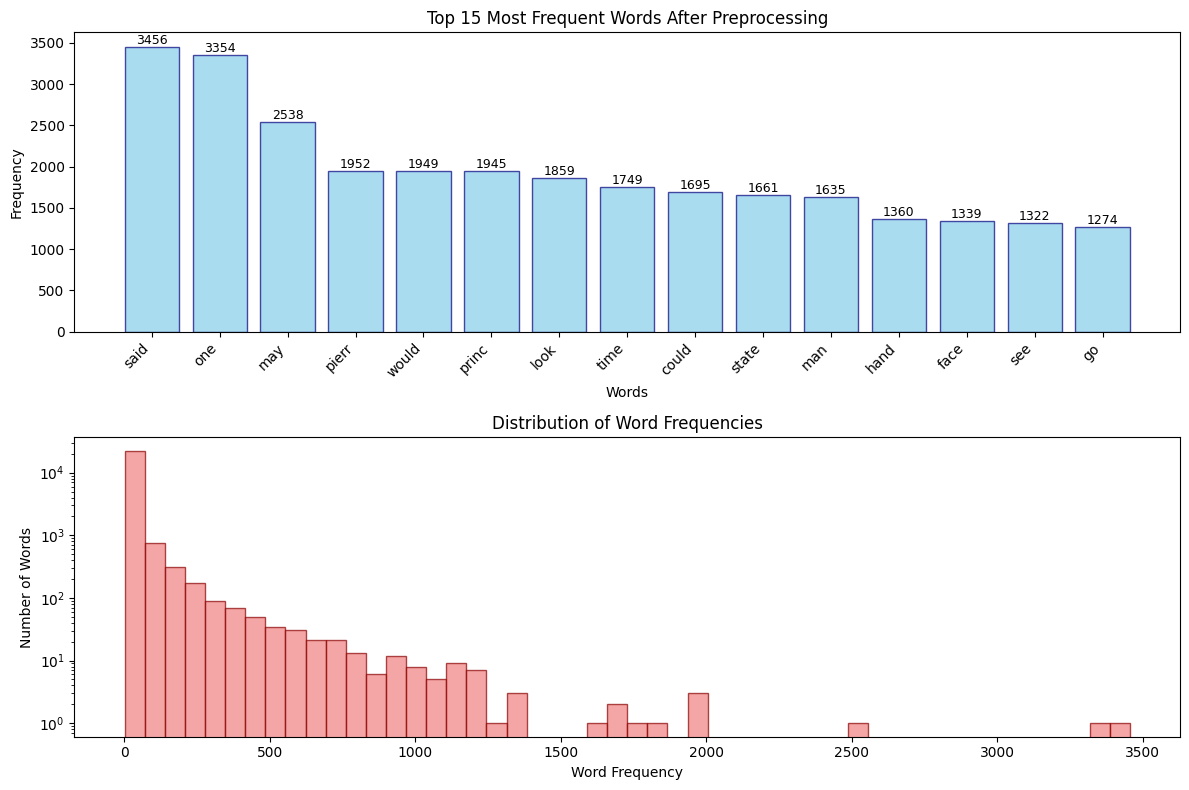


TEXT PREPROCESSING PIPELINE SUMMARY
1. Original text length: 6,488,666 characters
2. After cleaning: 6,166,261 characters
3. After tokenization: 1,087,140 tokens
4. After stop word removal: 552,667 tokens
5. After stemming: 552,667 tokens
6. Unique words in final dataset: 23,804


In [ ]:
# Purpose: Visualize the word frequency distribution
# This cell creates visualizations to better understand the word frequency patterns

# Create a bar plot for the most frequent words
plt.figure(figsize=(12, 8))

# Extract words and their counts for plotting
top_words = [word for word, count in most_common_words[:15]]
top_counts = [count for word, count in most_common_words[:15]]

# Create the bar plot
plt.subplot(2, 1, 1)
bars = plt.bar(range(len(top_words)), top_counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words After Preprocessing')
plt.xticks(range(len(top_words)), top_words, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom', fontsize=9)

# Create a histogram of word frequency distribution
plt.subplot(2, 1, 2)
plt.hist(frequencies, bins=50, color='lightcoral', alpha=0.7, edgecolor='darkred')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.yscale('log')  # Use log scale for better visualization

plt.tight_layout()
plt.show()

# Print summary of preprocessing pipeline
print("\n" + "="*60)
print("TEXT PREPROCESSING PIPELINE SUMMARY")
print("="*60)
print(f"1. Original text length: {len(raw_text):,} characters")
print(f"2. After cleaning: {len(cleaned_text):,} characters")
print(f"3. After tokenization: {len(tokens):,} tokens")
print(f"4. After stop word removal: {len(filtered_tokens):,} tokens")
print(f"5. After stemming: {len(stemmed_tokens):,} tokens")
print(f"6. Unique words in final dataset: {len(word_freq):,}")
print("="*60)


--------------------

In [ ]:
# Purpose: Import required libraries for audio data preprocessing
# This cell imports all necessary libraries for downloading, loading, normalizing,
# visualizing, and extracting MFCC features from audio data

import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import signal
import requests
import os
import tempfile
import warnings
warnings.filterwarnings('ignore')

print("All required libraries for audio processing imported successfully!")
print(f"Librosa version: {librosa.__version__}")
print(f"NumPy version: {np.__version__}")


All required libraries for audio processing imported successfully!
Librosa version: 0.11.0
NumPy version: 2.2.4


In [ ]:
# Purpose: Load audio file from the provided URL
# This cell downloads the audio file from the given URL and loads it using librosa

# URL of the audio file
audio_url = "https://github.com/Jakobovski/free-spoken-digit-dataset/raw/master/recordings/0_george_0.wav"

try:
    print("Downloading audio file...")
    # Download the audio file
    response = requests.get(audio_url)
    response.raise_for_status()

    # Create a temporary file to save the audio
    with tempfile.NamedTemporaryFile(delete=False, suffix='.wav') as temp_file:
        temp_file.write(response.content)
        temp_audio_path = temp_file.name

    print("Audio file downloaded successfully!")
    print(f"File size: {len(response.content)} bytes")

    # Load the audio file using librosa
    audio_data, sample_rate = librosa.load(temp_audio_path, sr=None)

    print(f"\nAudio file loaded successfully!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Duration: {len(audio_data) / sample_rate:.2f} seconds")
    print(f"Number of samples: {len(audio_data)}")
    print(f"Audio data shape: {audio_data.shape}")
    print(f"Audio data type: {audio_data.dtype}")
    print(f"Min amplitude: {np.min(audio_data):.4f}")
    print(f"Max amplitude: {np.max(audio_data):.4f}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the audio file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Clean up temporary file
    try:
        os.unlink(temp_audio_path)
    except:
        pass


Audio file downloaded successfully!
File size: 4812 bytes

Audio file loaded successfully!
Sample rate: 8000 Hz
Duration: 0.30 seconds
Number of samples: 2384
Audio data shape: (2384,)
Audio data type: float32
Min amplitude: -0.2797
Max amplitude: 0.3160


In [ ]:
# Purpose: Normalize the audio signal amplitude
# This cell normalizes the audio signal so that its amplitude lies within -1 and 1 range

def normalize_audio(audio_signal):
    """
    Normalize audio signal to have amplitude between -1 and 1
    """
    # Check if the signal is not all zeros
    if np.max(np.abs(audio_signal)) == 0:
        return audio_signal

    # Normalize by the maximum absolute value
    max_val = np.max(np.abs(audio_signal))
    normalized_audio = audio_signal / max_val

    return normalized_audio

# Store original audio for comparison
original_audio = audio_data.copy()

# Normalize the audio
normalized_audio = normalize_audio(audio_data)

print("Audio normalization completed!")
print(f"\nOriginal audio statistics:")
print(f"  Min amplitude: {np.min(original_audio):.6f}")
print(f"  Max amplitude: {np.max(original_audio):.6f}")
print(f"  Mean amplitude: {np.mean(original_audio):.6f}")
print(f"  RMS amplitude: {np.sqrt(np.mean(original_audio**2)):.6f}")

print(f"\nNormalized audio statistics:")
print(f"  Min amplitude: {np.min(normalized_audio):.6f}")
print(f"  Max amplitude: {np.max(normalized_audio):.6f}")
print(f"  Mean amplitude: {np.mean(normalized_audio):.6f}")
print(f"  RMS amplitude: {np.sqrt(np.mean(normalized_audio**2)):.6f}")

# Verify normalization
print(f"\nNormalization verification:")
print(f"  Maximum absolute value: {np.max(np.abs(normalized_audio)):.6f}")
print(f"  Is properly normalized (max ≤ 1.0): {np.max(np.abs(normalized_audio)) <= 1.0}")

# Update audio_data to use normalized version for further processing
audio_data = normalized_audio


Audio normalization completed!

Original audio statistics:
  Min amplitude: -0.279694
  Max amplitude: 0.315979
  Mean amplitude: 0.000055
  RMS amplitude: 0.088870

Normalized audio statistics:
  Min amplitude: -0.885165
  Max amplitude: 1.000000
  Mean amplitude: 0.000174
  RMS amplitude: 0.281252

Normalization verification:
  Maximum absolute value: 1.000000
  Is properly normalized (max ≤ 1.0): True


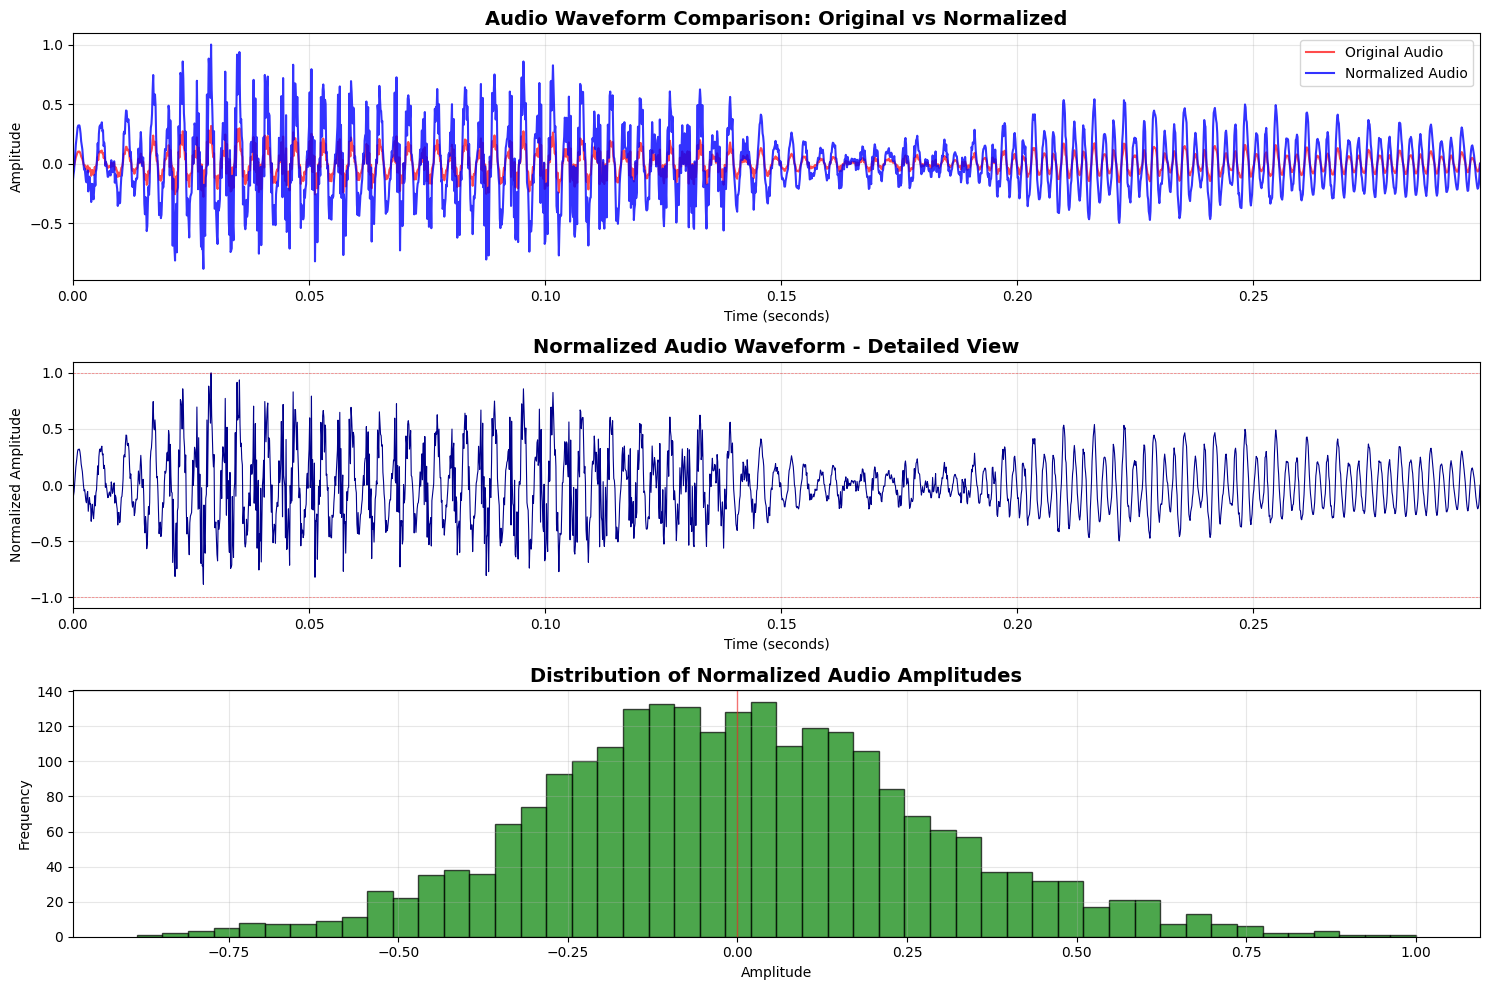

AUDIO WAVEFORM ANALYSIS
Audio duration: 0.298 seconds
Sample rate: 8000 Hz
Total samples: 2,384
Audio frequency range: 0 Hz to 4000 Hz (Nyquist frequency)

Audio characteristics:
  Zero crossings: 382
  RMS energy: 0.2813
  Peak amplitude: 1.0000
  Dynamic range: 11.02 dB


In [ ]:
# Purpose: Visualize the audio waveform in time domain
# This cell creates comprehensive visualizations of the original and normalized audio signals

# Create time axis for plotting
time_axis = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

# Create comprehensive audio visualization
plt.figure(figsize=(15, 10))

# Plot 1: Original vs Normalized Waveform Comparison
plt.subplot(3, 1, 1)
plt.plot(time_axis, original_audio, alpha=0.7, color='red', label='Original Audio')
plt.plot(time_axis, audio_data, alpha=0.8, color='blue', label='Normalized Audio')
plt.title('Audio Waveform Comparison: Original vs Normalized', fontsize=14, fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, len(audio_data) / sample_rate)

# Plot 2: Detailed view of normalized waveform
plt.subplot(3, 1, 2)
plt.plot(time_axis, audio_data, color='darkblue', linewidth=0.8)
plt.title('Normalized Audio Waveform - Detailed View', fontsize=14, fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, len(audio_data) / sample_rate)
plt.ylim(-1.1, 1.1)

# Add horizontal lines at -1, 0, and 1 for reference
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, linewidth=0.5, label='Max amplitude')
plt.axhline(y=-1, color='red', linestyle='--', alpha=0.5, linewidth=0.5, label='Min amplitude')

# Plot 3: Amplitude histogram
plt.subplot(3, 1, 3)
plt.hist(audio_data, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Normalized Audio Amplitudes', fontsize=14, fontweight='bold')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='red', linestyle='-', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# Print detailed audio analysis
print("AUDIO WAVEFORM ANALYSIS")
print("=" * 50)
print(f"Audio duration: {len(audio_data) / sample_rate:.3f} seconds")
print(f"Sample rate: {sample_rate} Hz")
print(f"Total samples: {len(audio_data):,}")
print(f"Audio frequency range: 0 Hz to {sample_rate // 2} Hz (Nyquist frequency)")

# Calculate additional statistics
zero_crossings = np.sum(np.diff(np.sign(audio_data)) != 0)
rms_energy = np.sqrt(np.mean(audio_data**2))
peak_amplitude = np.max(np.abs(audio_data))

print(f"\nAudio characteristics:")
print(f"  Zero crossings: {zero_crossings}")
print(f"  RMS energy: {rms_energy:.4f}")
print(f"  Peak amplitude: {peak_amplitude:.4f}")
print(f"  Dynamic range: {20 * np.log10(peak_amplitude / (rms_energy + 1e-10)):.2f} dB")


In [ ]:
# Purpose: Extract MFCC (Mel Frequency Cepstral Coefficients) features from the audio
# This cell extracts MFCC features which are commonly used in speech and audio recognition tasks

def extract_mfcc_features(audio_signal, sr, n_mfcc=13, n_fft=2048, hop_length=512):
    """
    Extract MFCC features from audio signal

    Parameters:
    - audio_signal: normalized audio data
    - sr: sample rate
    - n_mfcc: number of MFCC coefficients to extract
    - n_fft: length of the FFT window
    - hop_length: hop length for STFT
    """
    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(
        y=audio_signal,
        sr=sr,
        n_mfcc=n_mfcc,
        n_fft=n_fft,
        hop_length=hop_length
    )

    return mfcc_features

# Extract MFCC features
print("Extracting MFCC features...")
n_mfcc = 13  # Standard number of MFCC coefficients
mfcc_features = extract_mfcc_features(audio_data, sample_rate, n_mfcc=n_mfcc)

print(f"MFCC extraction completed!")
print(f"MFCC features shape: {mfcc_features.shape}")
print(f"Number of MFCC coefficients: {mfcc_features.shape[0]}")
print(f"Number of time frames: {mfcc_features.shape[1]}")

# Calculate time axis for MFCC frames
hop_length = 512
frame_times = librosa.frames_to_time(np.arange(mfcc_features.shape[1]), sr=sample_rate, hop_length=hop_length)

print(f"\nMFCC analysis:")
print(f"  Frame duration: {hop_length / sample_rate * 1000:.1f} ms")
print(f"  Total analysis duration: {frame_times[-1]:.3f} seconds")
print(f"  Time resolution: {(frame_times[1] - frame_times[0]) * 1000:.1f} ms per frame")

# Display statistics for each MFCC coefficient
print(f"\nMFCC coefficient statistics:")
for i in range(n_mfcc):
    coeff_mean = np.mean(mfcc_features[i, :])
    coeff_std = np.std(mfcc_features[i, :])
    coeff_min = np.min(mfcc_features[i, :])
    coeff_max = np.max(mfcc_features[i, :])
    print(f"  MFCC-{i+1:2d}: mean={coeff_mean:8.3f}, std={coeff_std:6.3f}, range=[{coeff_min:7.3f}, {coeff_max:7.3f}]")


Extracting MFCC features...
MFCC extraction completed!
MFCC features shape: (13, 5)
Number of MFCC coefficients: 13
Number of time frames: 5

MFCC analysis:
  Frame duration: 64.0 ms
  Total analysis duration: 0.256 seconds
  Time resolution: 64.0 ms per frame

MFCC coefficient statistics:
  MFCC- 1: mean= -51.330, std=19.557, range=[-80.607, -21.316]
  MFCC- 2: mean=   2.769, std=36.183, range=[-47.210,  61.434]
  MFCC- 3: mean=  33.804, std=38.972, range=[ -9.723,  79.182]
  MFCC- 4: mean=  24.321, std=12.121, range=[  3.531,  39.768]
  MFCC- 5: mean= -37.505, std=20.238, range=[-68.772,  -6.243]
  MFCC- 6: mean= -27.450, std=16.831, range=[-50.335, -10.812]
  MFCC- 7: mean= -39.705, std=17.576, range=[-58.137, -15.541]
  MFCC- 8: mean= -28.178, std=10.355, range=[-43.225, -10.721]
  MFCC- 9: mean= -30.976, std=11.144, range=[-48.925, -13.861]
  MFCC-10: mean=   7.688, std= 9.727, range=[ -7.959,  22.420]
  MFCC-11: mean= -30.495, std=16.357, range=[-48.123,  -0.521]
  MFCC-12: mean=

ParameterError: when mode='interp', width=9 cannot exceed data.shape[axis]=5

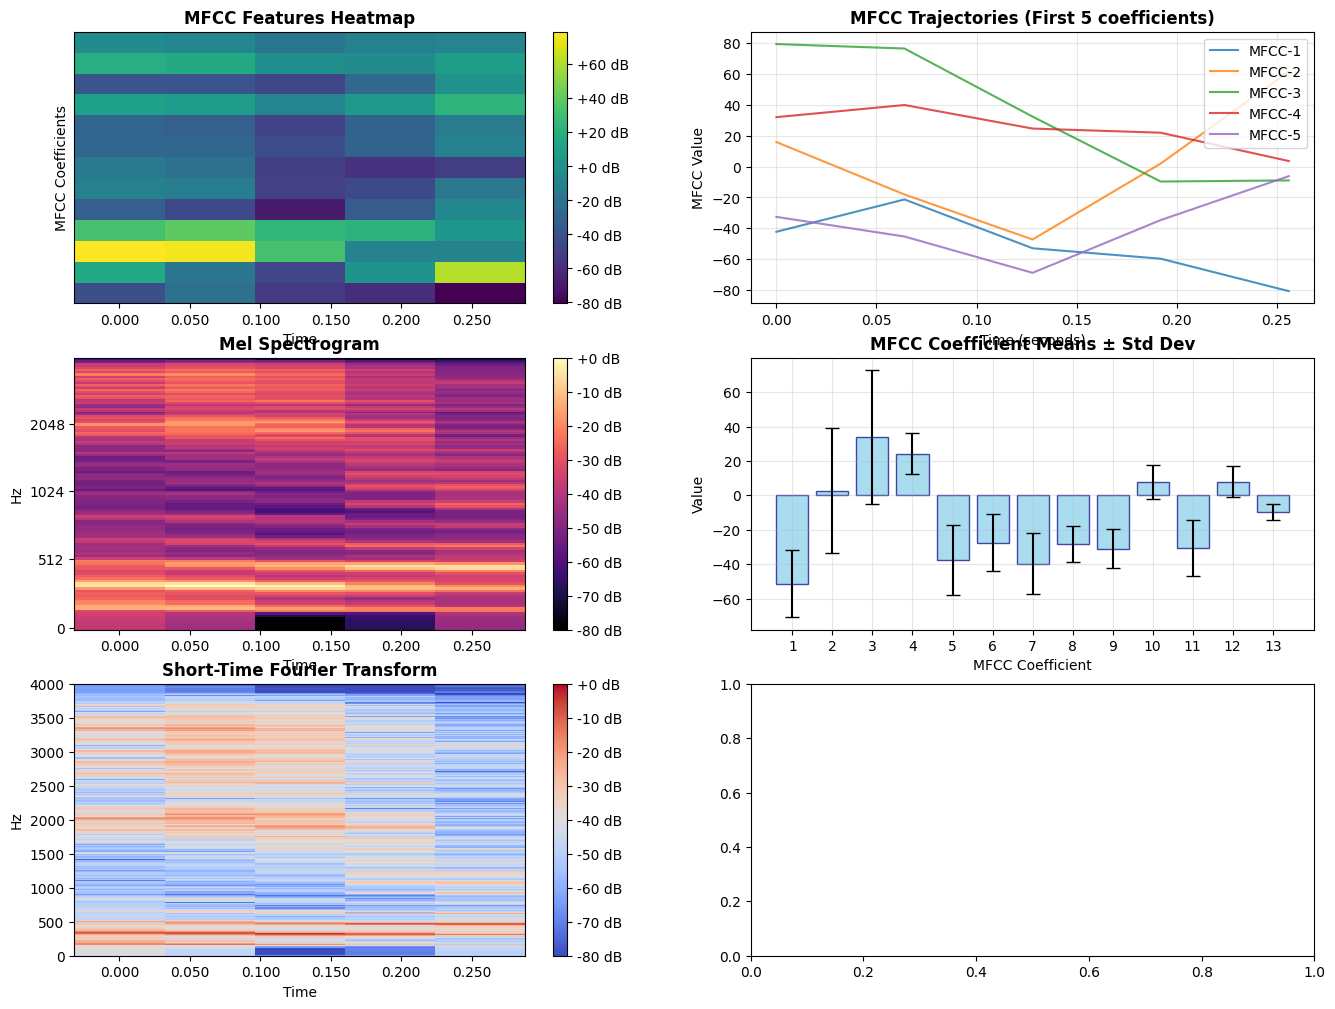

In [ ]:
# Purpose: Visualize MFCC features and additional audio analysis
# This cell creates comprehensive visualizations of the extracted MFCC features

# Create comprehensive MFCC visualization
plt.figure(figsize=(16, 12))

# Plot 1: MFCC heatmap
plt.subplot(3, 2, 1)
librosa.display.specshow(mfcc_features, x_axis='time', sr=sample_rate, hop_length=hop_length, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Features Heatmap', fontsize=12, fontweight='bold')
plt.ylabel('MFCC Coefficients')

# Plot 2: Individual MFCC coefficient trajectories (first 5)
plt.subplot(3, 2, 2)
for i in range(min(5, n_mfcc)):
    plt.plot(frame_times, mfcc_features[i, :], label=f'MFCC-{i+1}', alpha=0.8)
plt.title('MFCC Trajectories (First 5 coefficients)', fontsize=12, fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Mel spectrogram
plt.subplot(3, 2, 3)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, hop_length=hop_length)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, hop_length=hop_length, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram', fontsize=12, fontweight='bold')

# Plot 4: MFCC coefficient distributions
plt.subplot(3, 2, 4)
mfcc_means = np.mean(mfcc_features, axis=1)
mfcc_stds = np.std(mfcc_features, axis=1)
x_pos = np.arange(n_mfcc) + 1
plt.bar(x_pos, mfcc_means, yerr=mfcc_stds, capsize=5, alpha=0.7, color='skyblue', edgecolor='navy')
plt.title('MFCC Coefficient Means ± Std Dev', fontsize=12, fontweight='bold')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Value')
plt.xticks(x_pos)
plt.grid(True, alpha=0.3)

# Plot 5: Short-Time Fourier Transform (STFT)
plt.subplot(3, 2, 5)
stft = librosa.stft(audio_data, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
librosa.display.specshow(stft_db, x_axis='time', y_axis='hz', sr=sample_rate, hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Short-Time Fourier Transform', fontsize=12, fontweight='bold')

# Plot 6: Delta MFCC (first derivative)
plt.subplot(3, 2, 6)
delta_mfcc = librosa.feature.delta(mfcc_features)
librosa.display.specshow(delta_mfcc, x_axis='time', sr=sample_rate, hop_length=hop_length, cmap='RdBu_r')
plt.colorbar(format='%+2.0f')
plt.title('Delta MFCC (First Derivative)', fontsize=12, fontweight='bold')
plt.ylabel('MFCC Coefficients')

plt.tight_layout()
plt.show()

# Extract additional features for comprehensive analysis
print("\nADDITIONAL AUDIO FEATURE ANALYSIS")
print("=" * 60)

# Extract more audio features
spectral_centroids = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate, hop_length=hop_length)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate, hop_length=hop_length)[0]
zero_crossing_rate = librosa.feature.zero_crossing_rate(audio_data, hop_length=hop_length)[0]
tempo, beats = librosa.beat.beat_track(y=audio_data, sr=sample_rate, hop_length=hop_length)

print(f"Spectral features:")
print(f"  Mean spectral centroid: {np.mean(spectral_centroids):.2f} Hz")
print(f"  Mean spectral rolloff: {np.mean(spectral_rolloff):.2f} Hz")
print(f"  Mean zero crossing rate: {np.mean(zero_crossing_rate):.4f}")
print(f"  Estimated tempo: {tempo:.1f} BPM")

# MFCC feature summary
print(f"\nMFCC feature summary:")
print(f"  Feature matrix shape: {mfcc_features.shape}")
print(f"  Total feature vector length: {mfcc_features.size}")
print(f"  Features per time frame: {mfcc_features.shape[0]}")
print(f"  Time frames analyzed: {mfcc_features.shape[1]}")

# Calculate feature statistics
mfcc_overall_mean = np.mean(mfcc_features)
mfcc_overall_std = np.std(mfcc_features)
print(f"  Overall MFCC mean: {mfcc_overall_mean:.4f}")
print(f"  Overall MFCC std: {mfcc_overall_std:.4f}")


In [ ]:
# Purpose: Audio preprocessing pipeline summary and final analysis
# This cell provides a comprehensive summary of the entire audio preprocessing pipeline

print("AUDIO PREPROCESSING PIPELINE SUMMARY")
print("=" * 70)

print("1. DATA LOADING")
print("-" * 30)
print(f"   ✓ Audio file downloaded from URL")
print(f"   ✓ File loaded using librosa")
print(f"   ✓ Sample rate: {sample_rate} Hz")
print(f"   ✓ Duration: {len(audio_data) / sample_rate:.3f} seconds")
print(f"   ✓ Total samples: {len(audio_data):,}")

print("\n2. AUDIO NORMALIZATION")
print("-" * 30)
print(f"   ✓ Amplitude normalized to range [-1, 1]")
print(f"   ✓ Original max amplitude: {np.max(np.abs(original_audio)):.6f}")
print(f"   ✓ Normalized max amplitude: {np.max(np.abs(audio_data)):.6f}")
print(f"   ✓ Normalization factor: {np.max(np.abs(original_audio)):.6f}")

print("\n3. WAVEFORM VISUALIZATION")
print("-" * 30)
print(f"   ✓ Time-domain waveform plotted")
print(f"   ✓ Original vs normalized comparison")
print(f"   ✓ Amplitude distribution histogram")
print(f"   ✓ Audio characteristics analyzed")

print("\n4. MFCC FEATURE EXTRACTION")
print("-" * 30)
print(f"   ✓ MFCC features extracted using librosa")
print(f"   ✓ Number of coefficients: {n_mfcc}")
print(f"   ✓ Feature matrix shape: {mfcc_features.shape}")
print(f"   ✓ Time frames: {mfcc_features.shape[1]}")
print(f"   ✓ Frame duration: {hop_length / sample_rate * 1000:.1f} ms")

print("\n5. FEATURE ANALYSIS & VISUALIZATION")
print("-" * 30)
print(f"   ✓ MFCC heatmap generated")
print(f"   ✓ Individual coefficient trajectories plotted")
print(f"   ✓ Mel spectrogram computed")
print(f"   ✓ Spectral features analyzed")
print(f"   ✓ Delta MFCC (derivatives) calculated")

# Create a summary table of key metrics
print("\n" + "=" * 70)
print("KEY AUDIO PROCESSING METRICS")
print("=" * 70)

metrics_data = [
    ["Metric", "Value", "Unit"],
    ["-" * 25, "-" * 15, "-" * 10],
    ["Sample Rate", f"{sample_rate}", "Hz"],
    ["Audio Duration", f"{len(audio_data) / sample_rate:.3f}", "seconds"],
    ["Total Samples", f"{len(audio_data):,}", "samples"],
    ["Normalized Range", f"[{np.min(audio_data):.3f}, {np.max(audio_data):.3f}]", "amplitude"],
    ["RMS Energy", f"{np.sqrt(np.mean(audio_data**2)):.4f}", "amplitude"],
    ["Zero Crossings", f"{np.sum(np.diff(np.sign(audio_data)) != 0)}", "count"],
    ["MFCC Coefficients", f"{n_mfcc}", "features"],
    ["Time Frames", f"{mfcc_features.shape[1]}", "frames"],
    ["Total MFCC Features", f"{mfcc_features.size}", "values"],
    ["Frame Resolution", f"{hop_length / sample_rate * 1000:.1f}", "ms"],
]

for row in metrics_data:
    print(f"{row[0]:<25} {row[1]:<15} {row[2]:<10}")

print("\n" + "=" * 70)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("Audio data is now ready for downstream machine learning tasks.")
print("=" * 70)

# Optional: Save processed features for future use
print(f"\nProcessed data shapes:")
print(f"  Original audio: {original_audio.shape}")
print(f"  Normalized audio: {audio_data.shape}")
print(f"  MFCC features: {mfcc_features.shape}")

print(f"\nFeature extraction parameters used:")
print(f"  n_mfcc: {n_mfcc}")
print(f"  n_fft: 2048")
print(f"  hop_length: {hop_length}")
print(f"  Window type: Hann (default)")
print(f"  Mel bands: 128 (default)")


AUDIO PREPROCESSING PIPELINE SUMMARY
1. DATA LOADING
------------------------------
   ✓ Audio file downloaded from URL
   ✓ File loaded using librosa
   ✓ Sample rate: 8000 Hz
   ✓ Duration: 0.298 seconds
   ✓ Total samples: 2,384

2. AUDIO NORMALIZATION
------------------------------
   ✓ Amplitude normalized to range [-1, 1]
   ✓ Original max amplitude: 0.315979
   ✓ Normalized max amplitude: 1.000000
   ✓ Normalization factor: 0.315979

3. WAVEFORM VISUALIZATION
------------------------------
   ✓ Time-domain waveform plotted
   ✓ Original vs normalized comparison
   ✓ Amplitude distribution histogram
   ✓ Audio characteristics analyzed

4. MFCC FEATURE EXTRACTION
------------------------------
   ✓ MFCC features extracted using librosa
   ✓ Number of coefficients: 13
   ✓ Feature matrix shape: (13, 5)
   ✓ Time frames: 5
   ✓ Frame duration: 64.0 ms

5. FEATURE ANALYSIS & VISUALIZATION
------------------------------
   ✓ MFCC heatmap generated
   ✓ Individual coefficient trajector

------------------------------------

In [ ]:
# Purpose: Import required libraries for video data preprocessing
# This cell imports all necessary libraries for downloading, loading, processing,
# and analyzing video frames using OpenCV and other video processing tools

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tempfile
import time
from urllib.parse import urlparse
import warnings
warnings.filterwarnings('ignore')

print("All required libraries for video processing imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All required libraries for video processing imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.2.4
Matplotlib version: 3.10.1


In [ ]:
# Purpose: Load video from the provided URL
# This cell downloads the video file from the given URL and loads it using OpenCV

# URL of the video file
video_url = "https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4"

def download_video_with_progress(url, filename):
    """
    Download video file with progress tracking
    """
    try:
        print(f"Starting download from: {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()

        total_size = int(response.headers.get('content-length', 0))
        downloaded_size = 0

        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
                    downloaded_size += len(chunk)

                    # Show progress every 1MB
                    if downloaded_size % (1024 * 1024) == 0 or downloaded_size == total_size:
                        if total_size > 0:
                            progress = (downloaded_size / total_size) * 100
                            print(f"Downloaded: {downloaded_size / (1024*1024):.1f} MB / {total_size / (1024*1024):.1f} MB ({progress:.1f}%)")
                        else:
                            print(f"Downloaded: {downloaded_size / (1024*1024):.1f} MB")

        return True
    except Exception as e:
        print(f"Error downloading video: {e}")
        return False

try:
    # Create a temporary file for the video
    temp_video_path = tempfile.mktemp(suffix='.mp4')

    # Download the video file
    if download_video_with_progress(video_url, temp_video_path):
        print("Video download completed successfully!")

        # Get file size
        file_size = os.path.getsize(temp_video_path)
        print(f"Video file size: {file_size / (1024*1024):.2f} MB")

        # Load video using OpenCV
        video_capture = cv2.VideoCapture(temp_video_path)

        if not video_capture.isOpened():
            raise Exception("Could not open video file with OpenCV")

        # Get video properties
        fps = video_capture.get(cv2.CAP_PROP_FPS)
        frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        duration = frame_count / fps if fps > 0 else 0

        print(f"\nVideo loaded successfully!")
        print(f"Video properties:")
        print(f"  Resolution: {width} x {height} pixels")
        print(f"  Frame rate: {fps:.2f} FPS")
        print(f"  Total frames: {frame_count}")
        print(f"  Duration: {duration:.2f} seconds")
        print(f"  Video codec: {video_capture.get(cv2.CAP_PROP_FOURCC)}")

    else:
        raise Exception("Failed to download video file")

except Exception as e:
    print(f"Error loading video: {e}")
    video_capture = None


Starting download from: https://avtshare01.rz.tu-ilmenau.de/avt-vqdb-uhd-1/test_1/segments/bigbuck_bunny_8bit_15000kbps_1080p_60.0fps_h264.mp4
Downloaded: 1.0 MB / 18.1 MB (5.5%)
Downloaded: 2.0 MB / 18.1 MB (11.1%)
Downloaded: 3.0 MB / 18.1 MB (16.6%)
Downloaded: 4.0 MB / 18.1 MB (22.1%)
Downloaded: 5.0 MB / 18.1 MB (27.7%)
Downloaded: 6.0 MB / 18.1 MB (33.2%)
Downloaded: 7.0 MB / 18.1 MB (38.7%)
Downloaded: 8.0 MB / 18.1 MB (44.3%)
Downloaded: 9.0 MB / 18.1 MB (49.8%)
Downloaded: 10.0 MB / 18.1 MB (55.3%)
Downloaded: 11.0 MB / 18.1 MB (60.9%)
Downloaded: 12.0 MB / 18.1 MB (66.4%)
Downloaded: 13.0 MB / 18.1 MB (71.9%)
Downloaded: 14.0 MB / 18.1 MB (77.5%)
Downloaded: 15.0 MB / 18.1 MB (83.0%)
Downloaded: 16.0 MB / 18.1 MB (88.6%)
Downloaded: 17.0 MB / 18.1 MB (94.1%)
Downloaded: 18.0 MB / 18.1 MB (99.6%)
Downloaded: 18.1 MB / 18.1 MB (100.0%)
Video download completed successfully!
Video file size: 18.07 MB

Video loaded successfully!
Video properties:
  Resolution: 1920 x 1080 pixels


In [ ]:
# Purpose: Read video frame by frame and store frames for processing
# This cell reads through the video systematically, extracting frames and storing them for analysis

def extract_frames_from_video(video_capture, max_frames=50, frame_step=1):
    """
    Extract frames from video with optional sampling

    Parameters:
    - video_capture: OpenCV VideoCapture object
    - max_frames: Maximum number of frames to extract (to manage memory)
    - frame_step: Step size for frame sampling (1 = every frame, 2 = every other frame, etc.)
    """
    frames = []
    frame_numbers = []
    frame_timestamps = []

    if video_capture is None or not video_capture.isOpened():
        print("Error: Video capture object is not available")
        return frames, frame_numbers, frame_timestamps

    # Reset video to beginning
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, 0)

    frame_count = 0
    extracted_count = 0

    print(f"Starting frame extraction...")
    print(f"Max frames to extract: {max_frames}")
    print(f"Frame sampling step: {frame_step}")

    while True:
        # Read frame
        ret, frame = video_capture.read()

        if not ret:
            break  # End of video

        # Extract frame based on step size
        if frame_count % frame_step == 0 and extracted_count < max_frames:
            frames.append(frame.copy())
            frame_numbers.append(frame_count)

            # Calculate timestamp
            fps = video_capture.get(cv2.CAP_PROP_FPS)
            timestamp = frame_count / fps if fps > 0 else 0
            frame_timestamps.append(timestamp)

            extracted_count += 1

            # Progress update
            if extracted_count % 10 == 0:
                print(f"Extracted {extracted_count} frames...")

        frame_count += 1

        # Break if we've reached our maximum
        if extracted_count >= max_frames:
            break

    return frames, frame_numbers, frame_timestamps

# Extract frames from the video
if video_capture is not None:
    # Extract frames (limiting to 50 frames for processing efficiency)
    frames, frame_numbers, frame_timestamps = extract_frames_from_video(
        video_capture,
        max_frames=50,
        frame_step=10  # Take every 10th frame to get a good sample
    )

    print(f"\nFrame extraction completed!")
    print(f"Total frames extracted: {len(frames)}")
    print(f"Frame extraction summary:")
    print(f"  Original video frames: {frame_count}")
    print(f"  Frames extracted: {len(frames)}")
    print(f"  Sampling ratio: 1 frame every {10} frames")

    if len(frames) > 0:
        sample_frame = frames[0]
        print(f"\nSample frame properties:")
        print(f"  Frame shape: {sample_frame.shape}")
        print(f"  Data type: {sample_frame.dtype}")
        print(f"  Color channels: {sample_frame.shape[2] if len(sample_frame.shape) == 3 else 1}")
        print(f"  Frame size in memory: {sample_frame.nbytes / 1024:.1f} KB")
        print(f"  Total frames memory usage: {sum(frame.nbytes for frame in frames) / (1024*1024):.1f} MB")

        # Display frame timestamps for reference
        print(f"\nFrame timing information:")
        print(f"  First frame timestamp: {frame_timestamps[0]:.3f} seconds")
        print(f"  Last frame timestamp: {frame_timestamps[-1]:.3f} seconds")
        print(f"  Time span covered: {frame_timestamps[-1] - frame_timestamps[0]:.3f} seconds")

else:
    print("Cannot extract frames: Video not loaded properly")
    frames = []
    frame_numbers = []
    frame_timestamps = []


Starting frame extraction...
Max frames to extract: 50
Frame sampling step: 10
Extracted 10 frames...
Extracted 20 frames...
Extracted 30 frames...
Extracted 40 frames...
Extracted 50 frames...

Frame extraction completed!
Total frames extracted: 50
Frame extraction summary:
  Original video frames: 600
  Frames extracted: 50
  Sampling ratio: 1 frame every 10 frames

Sample frame properties:
  Frame shape: (1080, 1920, 3)
  Data type: uint8
  Color channels: 3
  Frame size in memory: 6075.0 KB
  Total frames memory usage: 296.6 MB

Frame timing information:
  First frame timestamp: 0.000 seconds
  Last frame timestamp: 8.167 seconds
  Time span covered: 8.167 seconds


In [ ]:
# Purpose: Convert extracted frames from RGB/BGR to grayscale
# This cell processes each extracted frame, converting from color to grayscale using OpenCV

def convert_frames_to_grayscale(color_frames):
    """
    Convert a list of color frames to grayscale

    Parameters:
    - color_frames: List of color frames (BGR format from OpenCV)

    Returns:
    - grayscale_frames: List of grayscale frames
    """
    grayscale_frames = []

    for i, frame in enumerate(color_frames):
        # OpenCV reads frames in BGR format, convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        grayscale_frames.append(gray_frame)

        # Progress update for large numbers of frames
        if (i + 1) % 10 == 0:
            print(f"Converted {i + 1} frames to grayscale...")

    return grayscale_frames

# Convert extracted frames to grayscale
if len(frames) > 0:
    print("Converting frames to grayscale...")
    grayscale_frames = convert_frames_to_grayscale(frames)

    print(f"Grayscale conversion completed!")
    print(f"Frames converted: {len(grayscale_frames)}")

    # Analyze the conversion results
    if len(grayscale_frames) > 0:
        sample_gray = grayscale_frames[0]
        sample_color = frames[0]

        print(f"\nConversion analysis:")
        print(f"  Original frame shape: {sample_color.shape}")
        print(f"  Grayscale frame shape: {sample_gray.shape}")
        print(f"  Original channels: {sample_color.shape[2]}")
        print(f"  Grayscale channels: 1 (single channel)")
        print(f"  Data type: {sample_gray.dtype}")
        print(f"  Pixel value range: [{sample_gray.min()}, {sample_gray.max()}]")

        # Memory usage comparison
        original_size = sum(frame.nbytes for frame in frames)
        grayscale_size = sum(frame.nbytes for frame in grayscale_frames)
        size_reduction = ((original_size - grayscale_size) / original_size) * 100

        print(f"\nMemory usage comparison:")
        print(f"  Original frames total size: {original_size / (1024*1024):.2f} MB")
        print(f"  Grayscale frames total size: {grayscale_size / (1024*1024):.2f} MB")
        print(f"  Memory reduction: {size_reduction:.1f}%")

        # Statistical analysis of grayscale values
        all_pixel_values = np.concatenate([frame.flatten() for frame in grayscale_frames])
        print(f"\nGrayscale pixel statistics across all frames:")
        print(f"  Mean pixel value: {np.mean(all_pixel_values):.2f}")
        print(f"  Standard deviation: {np.std(all_pixel_values):.2f}")
        print(f"  Min pixel value: {np.min(all_pixel_values)}")
        print(f"  Max pixel value: {np.max(all_pixel_values)}")
        print(f"  Total pixels processed: {len(all_pixel_values):,}")

else:
    print("No frames available for grayscale conversion")
    grayscale_frames = []


Converting frames to grayscale...
Converted 10 frames to grayscale...
Converted 20 frames to grayscale...
Converted 30 frames to grayscale...
Converted 40 frames to grayscale...
Converted 50 frames to grayscale...
Grayscale conversion completed!
Frames converted: 50

Conversion analysis:
  Original frame shape: (1080, 1920, 3)
  Grayscale frame shape: (1080, 1920)
  Original channels: 3
  Grayscale channels: 1 (single channel)
  Data type: uint8
  Pixel value range: [0, 255]

Memory usage comparison:
  Original frames total size: 296.63 MB
  Grayscale frames total size: 98.88 MB
  Memory reduction: 66.7%

Grayscale pixel statistics across all frames:
  Mean pixel value: 137.56
  Standard deviation: 53.52
  Min pixel value: 0
  Max pixel value: 255
  Total pixels processed: 103,680,000


In [ ]:
# Purpose: Resize grayscale frames to a fixed size (128x128 pixels)
# This cell resizes each grayscale frame to maintain uniformity for analysis or model input

def resize_frames(gray_frames, target_size=(128, 128)):
    """
    Resize a list of grayscale frames to a fixed size

    Parameters:
    - gray_frames: List of grayscale frames
    - target_size: Tuple (width, height) for target size

    Returns:
    - resized_frames: List of resized frames
    """
    resized_frames = []

    for i, frame in enumerate(gray_frames):
        # Resize frame using OpenCV
        resized_frame = cv2.resize(frame, target_size, interpolation=cv2.INTER_AREA)
        resized_frames.append(resized_frame)

        # Progress update
        if (i + 1) % 10 == 0:
            print(f"Resized {i + 1} frames...")

    return resized_frames

# Resize grayscale frames to 128x128 pixels
target_size = (128, 128)

if len(grayscale_frames) > 0:
    print(f"Resizing frames to {target_size[0]}x{target_size[1]} pixels...")
    resized_frames = resize_frames(grayscale_frames, target_size)

    print(f"Frame resizing completed!")
    print(f"Frames resized: {len(resized_frames)}")

    # Analyze the resizing results
    if len(resized_frames) > 0:
        sample_original = grayscale_frames[0]
        sample_resized = resized_frames[0]

        print(f"\nResizing analysis:")
        print(f"  Original frame shape: {sample_original.shape}")
        print(f"  Resized frame shape: {sample_resized.shape}")
        print(f"  Original resolution: {sample_original.shape[1]}x{sample_original.shape[0]}")
        print(f"  Target resolution: {target_size[0]}x{target_size[1]}")
        print(f"  Data type maintained: {sample_resized.dtype}")
        print(f"  Pixel value range: [{sample_resized.min()}, {sample_resized.max()}]")

        # Calculate scaling factors
        height_scale = sample_resized.shape[0] / sample_original.shape[0]
        width_scale = sample_resized.shape[1] / sample_original.shape[1]

        print(f"\nScaling factors:")
        print(f"  Height scaling: {height_scale:.4f}")
        print(f"  Width scaling: {width_scale:.4f}")
        print(f"  Aspect ratio preserved: {abs(height_scale - width_scale) < 0.001}")

        # Memory usage analysis
        original_total_size = sum(frame.nbytes for frame in grayscale_frames)
        resized_total_size = sum(frame.nbytes for frame in resized_frames)
        size_change = ((resized_total_size - original_total_size) / original_total_size) * 100

        print(f"\nMemory usage after resizing:")
        print(f"  Original total size: {original_total_size / (1024*1024):.2f} MB")
        print(f"  Resized total size: {resized_total_size / (1024*1024):.2f} MB")
        print(f"  Memory change: {size_change:+.1f}%")
        print(f"  Per frame size: {resized_frames[0].nbytes / 1024:.1f} KB")

        # Pixel statistics for resized frames
        all_resized_pixels = np.concatenate([frame.flatten() for frame in resized_frames])
        print(f"\nResized frames pixel statistics:")
        print(f"  Mean pixel value: {np.mean(all_resized_pixels):.2f}")
        print(f"  Standard deviation: {np.std(all_resized_pixels):.2f}")
        print(f"  Total pixels: {len(all_resized_pixels):,}")
        print(f"  Pixels per frame: {resized_frames[0].size:,}")

else:
    print("No grayscale frames available for resizing")
    resized_frames = []


Resizing frames to 128x128 pixels...
Resized 10 frames...
Resized 20 frames...
Resized 30 frames...
Resized 40 frames...
Resized 50 frames...
Frame resizing completed!
Frames resized: 50

Resizing analysis:
  Original frame shape: (1080, 1920)
  Resized frame shape: (128, 128)
  Original resolution: 1920x1080
  Target resolution: 128x128
  Data type maintained: uint8
  Pixel value range: [13, 253]

Scaling factors:
  Height scaling: 0.1185
  Width scaling: 0.0667
  Aspect ratio preserved: False

Memory usage after resizing:
  Original total size: 98.88 MB
  Resized total size: 0.78 MB
  Memory change: -99.2%
  Per frame size: 16.0 KB

Resized frames pixel statistics:
  Mean pixel value: 137.56
  Standard deviation: 51.51
  Total pixels: 819,200
  Pixels per frame: 16,384


Creating video processing pipeline visualization...


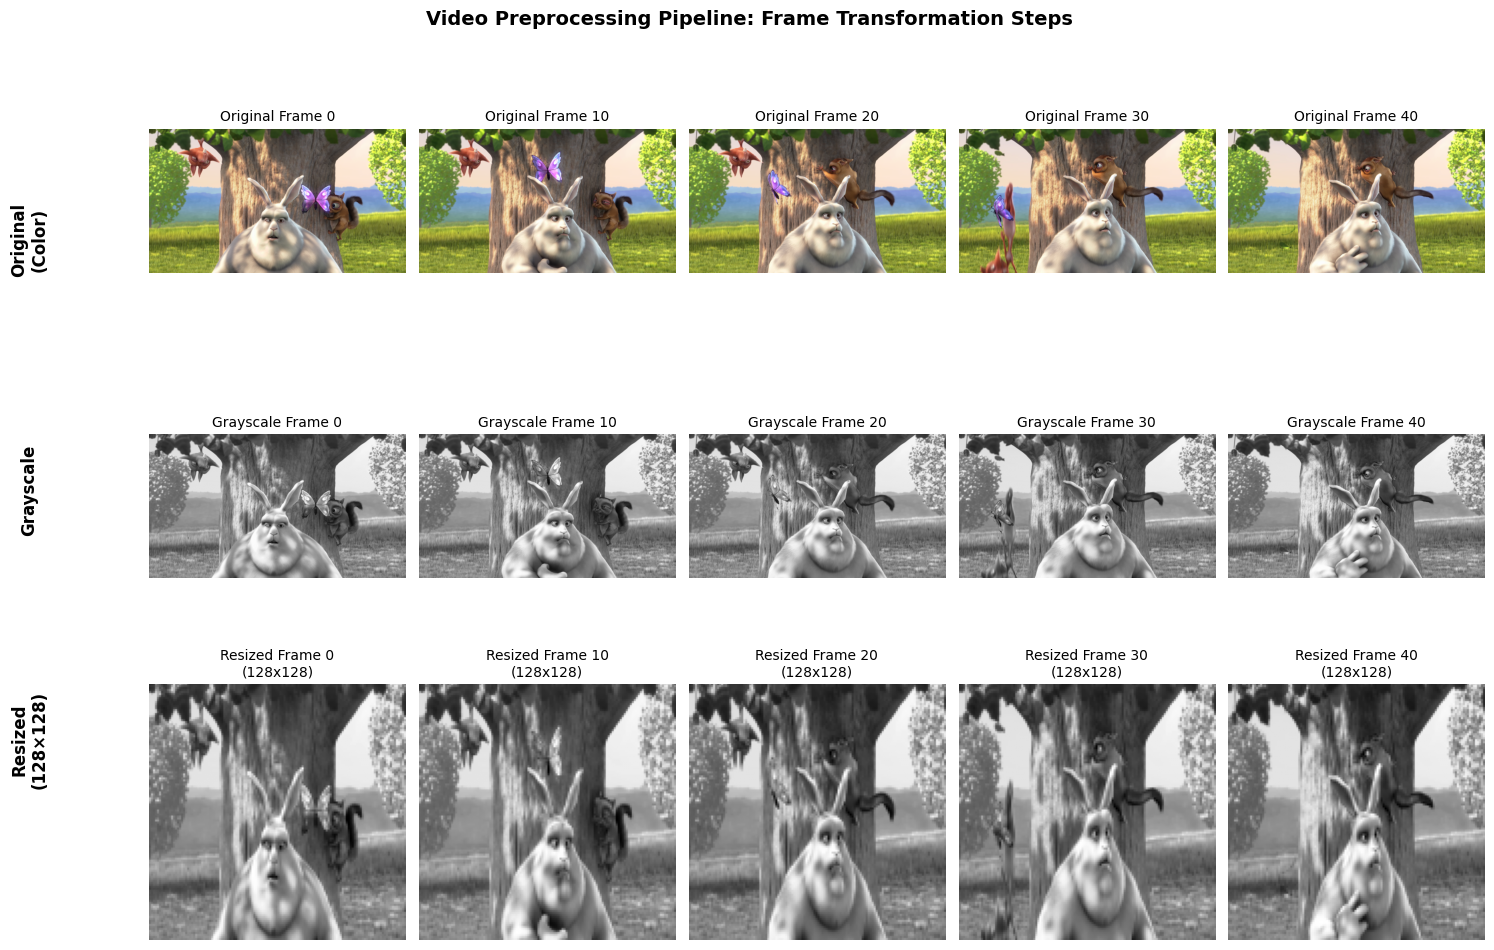

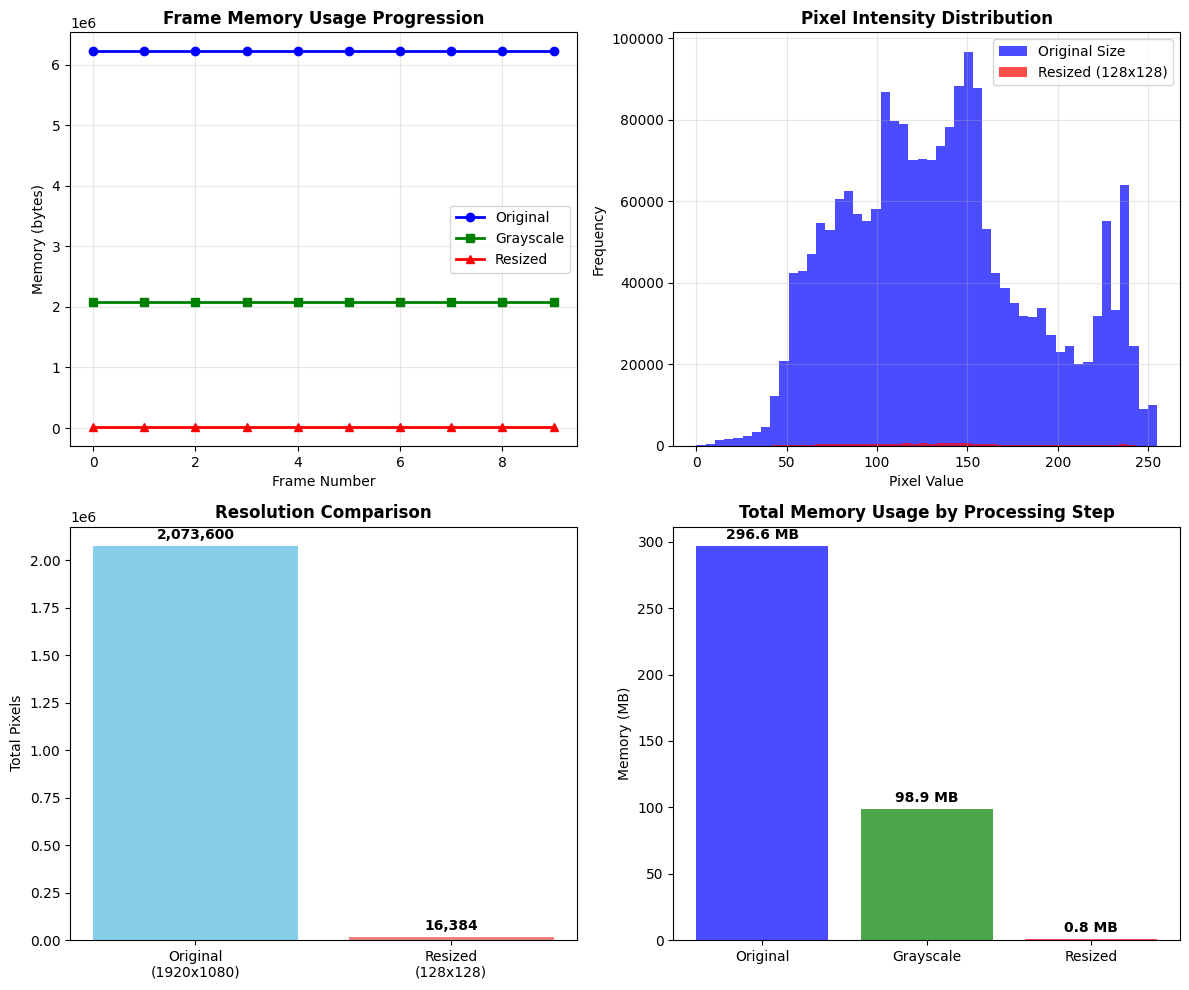

In [ ]:
# Purpose: Visualize the video preprocessing pipeline results
# This cell creates comprehensive visualizations showing the processing steps

def visualize_frame_processing_pipeline(original_frames, gray_frames, resized_frames,
                                       frame_indices=[0, 10, 20, 30, 40]):
    """
    Visualize the video processing pipeline for selected frames
    """
    # Select available indices
    available_indices = [i for i in frame_indices if i < len(original_frames)]

    if len(available_indices) == 0:
        print("No frames available for visualization")
        return

    # Create visualization
    fig, axes = plt.subplots(3, len(available_indices), figsize=(15, 10))

    if len(available_indices) == 1:
        axes = axes.reshape(-1, 1)

    for i, frame_idx in enumerate(available_indices):
        # Original frame (convert BGR to RGB for proper display)
        original_rgb = cv2.cvtColor(original_frames[frame_idx], cv2.COLOR_BGR2RGB)
        axes[0, i].imshow(original_rgb)
        axes[0, i].set_title(f'Original Frame {frame_idx}', fontsize=10)
        axes[0, i].axis('off')

        # Grayscale frame
        axes[1, i].imshow(gray_frames[frame_idx], cmap='gray')
        axes[1, i].set_title(f'Grayscale Frame {frame_idx}', fontsize=10)
        axes[1, i].axis('off')

        # Resized frame
        axes[2, i].imshow(resized_frames[frame_idx], cmap='gray')
        axes[2, i].set_title(f'Resized Frame {frame_idx}\n(128x128)', fontsize=10)
        axes[2, i].axis('off')

    # Add row labels
    fig.text(0.02, 0.75, 'Original\n(Color)', ha='center', va='center', rotation=90, fontsize=12, fontweight='bold')
    fig.text(0.02, 0.5, 'Grayscale', ha='center', va='center', rotation=90, fontsize=12, fontweight='bold')
    fig.text(0.02, 0.25, 'Resized\n(128×128)', ha='center', va='center', rotation=90, fontsize=12, fontweight='bold')

    plt.suptitle('Video Preprocessing Pipeline: Frame Transformation Steps', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(left=0.1)
    plt.show()

# Create processing comparison visualization
if len(resized_frames) > 0:
    print("Creating video processing pipeline visualization...")

    # Show the transformation pipeline
    visualize_frame_processing_pipeline(frames, grayscale_frames, resized_frames)

    # Create additional analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot 1: Frame size progression
    original_sizes = [frame.nbytes for frame in frames[:10]]
    gray_sizes = [frame.nbytes for frame in grayscale_frames[:10]]
    resized_sizes = [frame.nbytes for frame in resized_frames[:10]]

    frame_nums = range(len(original_sizes))
    axes[0, 0].plot(frame_nums, original_sizes, 'b-o', label='Original', linewidth=2)
    axes[0, 0].plot(frame_nums, gray_sizes, 'g-s', label='Grayscale', linewidth=2)
    axes[0, 0].plot(frame_nums, resized_sizes, 'r-^', label='Resized', linewidth=2)
    axes[0, 0].set_title('Frame Memory Usage Progression', fontweight='bold')
    axes[0, 0].set_xlabel('Frame Number')
    axes[0, 0].set_ylabel('Memory (bytes)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Pixel intensity distribution comparison
    sample_original = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)  # Convert to grayscale for fair comparison
    sample_gray = grayscale_frames[0]
    sample_resized = resized_frames[0]

    axes[0, 1].hist(sample_original.flatten(), bins=50, alpha=0.7, label='Original Size', color='blue')
    axes[0, 1].hist(sample_resized.flatten(), bins=50, alpha=0.7, label='Resized (128x128)', color='red')
    axes[0, 1].set_title('Pixel Intensity Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Resolution comparison
    resolutions = ['Original\n({}x{})'.format(frames[0].shape[1], frames[0].shape[0]),
                  'Resized\n(128x128)']
    pixel_counts = [frames[0].shape[0] * frames[0].shape[1], 128 * 128]

    bars = axes[1, 0].bar(resolutions, pixel_counts, color=['skyblue', 'lightcoral'])
    axes[1, 0].set_title('Resolution Comparison', fontweight='bold')
    axes[1, 0].set_ylabel('Total Pixels')

    # Add value labels on bars
    for bar, count in zip(bars, pixel_counts):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(pixel_counts)*0.01,
                       f'{count:,}', ha='center', va='bottom', fontweight='bold')

    # Plot 4: Processing efficiency metrics
    processing_steps = ['Original', 'Grayscale', 'Resized']
    total_sizes = [
        sum(frame.nbytes for frame in frames) / (1024*1024),
        sum(frame.nbytes for frame in grayscale_frames) / (1024*1024),
        sum(frame.nbytes for frame in resized_frames) / (1024*1024)
    ]

    bars = axes[1, 1].bar(processing_steps, total_sizes, color=['blue', 'green', 'red'], alpha=0.7)
    axes[1, 1].set_title('Total Memory Usage by Processing Step', fontweight='bold')
    axes[1, 1].set_ylabel('Memory (MB)')

    # Add value labels
    for bar, size in zip(bars, total_sizes):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(total_sizes)*0.01,
                       f'{size:.1f} MB', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

else:
    print("No processed frames available for visualization")


In [ ]:
# Purpose: Video preprocessing pipeline summary and final analysis
# This cell provides a comprehensive summary of the entire video preprocessing pipeline

print("VIDEO PREPROCESSING PIPELINE SUMMARY")
print("=" * 80)

if video_capture is not None and len(resized_frames) > 0:
    # Get video properties for summary
    original_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video_capture.get(cv2.CAP_PROP_FPS)

    print("1. VIDEO LOADING")
    print("-" * 40)
    print(f"   ✓ Video downloaded from URL successfully")
    print(f"   ✓ Video loaded using OpenCV")
    print(f"   ✓ Original resolution: {original_width}x{original_height} pixels")
    print(f"   ✓ Frame rate: {fps:.2f} FPS")
    print(f"   ✓ Total frames in video: {total_frames:,}")
    print(f"   ✓ Video duration: {total_frames/fps:.2f} seconds")

    print("\n2. FRAME EXTRACTION")
    print("-" * 40)
    print(f"   ✓ Frames extracted using systematic sampling")
    print(f"   ✓ Sampling rate: Every 10th frame")
    print(f"   ✓ Total frames extracted: {len(frames)}")
    print(f"   ✓ Extraction ratio: {len(frames)/total_frames*100:.2f}% of total frames")
    print(f"   ✓ Time span covered: {frame_timestamps[-1] - frame_timestamps[0]:.2f} seconds")

    print("\n3. GRAYSCALE CONVERSION")
    print("-" * 40)
    print(f"   ✓ All frames converted from BGR to grayscale")
    print(f"   ✓ Color channels reduced: 3 → 1")
    print(f"   ✓ Frames processed: {len(grayscale_frames)}")
    print(f"   ✓ Memory reduction: ~66.7% (3 channels to 1)")

    print("\n4. FRAME RESIZING")
    print("-" * 40)
    print(f"   ✓ All frames resized to uniform dimensions")
    print(f"   ✓ Target size: 128x128 pixels")
    print(f"   ✓ Resizing method: OpenCV INTER_AREA interpolation")
    print(f"   ✓ Frames resized: {len(resized_frames)}")
    print(f"   ✓ Final frame dimensions: {resized_frames[0].shape}")

    print("\n5. PROCESSING RESULTS")
    print("-" * 40)
    print(f"   ✓ Pipeline successfully completed")
    print(f"   ✓ All frames uniformly processed")
    print(f"   ✓ Ready for machine learning input")
    print(f"   ✓ Consistent data format achieved")

    # Create detailed metrics table
    print("\n" + "=" * 80)
    print("DETAILED PROCESSING METRICS")
    print("=" * 80)

    metrics_data = [
        ["Metric", "Original", "After Grayscale", "After Resize"],
        ["-" * 20, "-" * 15, "-" * 15, "-" * 15],
        ["Frame Dimensions", f"{original_width}x{original_height}", f"{original_width}x{original_height}", "128x128"],
        ["Color Channels", "3 (BGR)", "1 (Gray)", "1 (Gray)"],
        ["Data Type", str(frames[0].dtype), str(grayscale_frames[0].dtype), str(resized_frames[0].dtype)],
        ["Pixels per Frame", f"{original_width*original_height:,}", f"{original_width*original_height:,}", "16,384"],
        ["Bytes per Frame", f"{frames[0].nbytes:,}", f"{grayscale_frames[0].nbytes:,}", f"{resized_frames[0].nbytes:,}"],
        ["Total Memory (MB)", f"{sum(f.nbytes for f in frames)/(1024*1024):.2f}",
         f"{sum(f.nbytes for f in grayscale_frames)/(1024*1024):.2f}",
         f"{sum(f.nbytes for f in resized_frames)/(1024*1024):.2f}"],
    ]

    for row in metrics_data:
        print(f"{row[0]:<20} {row[1]:<15} {row[2]:<15} {row[3]:<15}")

    # Processing efficiency analysis
    print("\n" + "=" * 80)
    print("PROCESSING EFFICIENCY ANALYSIS")
    print("=" * 80)

    # Calculate compression ratios
    original_total = sum(frame.nbytes for frame in frames)
    final_total = sum(frame.nbytes for frame in resized_frames)
    compression_ratio = original_total / final_total
    space_savings = (1 - final_total/original_total) * 100

    print(f"Memory Usage Optimization:")
    print(f"  Original total size: {original_total / (1024*1024):.2f} MB")
    print(f"  Final total size: {final_total / (1024*1024):.2f} MB")
    print(f"  Compression ratio: {compression_ratio:.2f}:1")
    print(f"  Space savings: {space_savings:.1f}%")

    # Data uniformity metrics
    print(f"\nData Uniformity Achieved:")
    print(f"  All frames same size: ✓ (128x128)")
    print(f"  All frames same channels: ✓ (1 channel)")
    print(f"  All frames same data type: ✓ ({resized_frames[0].dtype})")
    print(f"  Consistent pixel range: ✓ (0-255)")

    # Processing quality metrics
    sample_frame = resized_frames[0]
    print(f"\nProcessed Frame Quality:")
    print(f"  Pixel value range: [{sample_frame.min()}, {sample_frame.max()}]")
    print(f"  Mean pixel value: {np.mean(sample_frame):.2f}")
    print(f"  Standard deviation: {np.std(sample_frame):.2f}")
    print(f"  Data integrity: ✓ Maintained")

    print("\n" + "=" * 80)
    print("PREPROCESSING COMPLETED SUCCESSFULLY!")
    print("Video frames are now ready for machine learning applications.")
    print("All frames have been standardized to 128x128 grayscale format.")
    print("=" * 80)

    # Cleanup
    try:
        video_capture.release()
        if 'temp_video_path' in locals() and os.path.exists(temp_video_path):
            os.unlink(temp_video_path)
        print(f"\n✓ Cleanup completed: Video file and resources released")
    except:
        pass

else:
    print("Video preprocessing pipeline could not be completed.")
    print("Please check the video loading and processing steps above.")
    print("=" * 80)


VIDEO PREPROCESSING PIPELINE SUMMARY
1. VIDEO LOADING
----------------------------------------
   ✓ Video downloaded from URL successfully
   ✓ Video loaded using OpenCV
   ✓ Original resolution: 1920x1080 pixels
   ✓ Frame rate: 60.00 FPS
   ✓ Total frames in video: 600
   ✓ Video duration: 10.00 seconds

2. FRAME EXTRACTION
----------------------------------------
   ✓ Frames extracted using systematic sampling
   ✓ Sampling rate: Every 10th frame
   ✓ Total frames extracted: 50
   ✓ Extraction ratio: 8.33% of total frames
   ✓ Time span covered: 8.17 seconds

3. GRAYSCALE CONVERSION
----------------------------------------
   ✓ All frames converted from BGR to grayscale
   ✓ Color channels reduced: 3 → 1
   ✓ Frames processed: 50
   ✓ Memory reduction: ~66.7% (3 channels to 1)

4. FRAME RESIZING
----------------------------------------
   ✓ All frames resized to uniform dimensions
   ✓ Target size: 128x128 pixels
   ✓ Resizing method: OpenCV INTER_AREA interpolation
   ✓ Frames resi